# Example for running MDMC only

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from equilibrator_api import ComponentContribution, Q_
from equilibrator_pathway import Pathway, PathwayThermoModel
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import optlang

In [3]:
comp_contrib = ComponentContribution()

Fragments already downloaded
Fragments already downloaded


In [4]:
pp = Pathway.from_sbtab("../ecoli_noor_2016_mdf.tsv", comp_contrib=comp_contrib)
pp.update_standard_dgs()

In [5]:
ptm = pp._make_pathway_thermo_model()

In [6]:
mdf_sol = ptm.find_mdf()
mdf_value = mdf_sol.mdf.m_as("kJ/mol")
print(f"MDF = {mdf_value:.2f} kJ/mol")

Using license file /home/noore/opt/gurobi902/linux64/gurobi.lic
Academic license - for non-commercial use only
MDF = 3.06 kJ/mol


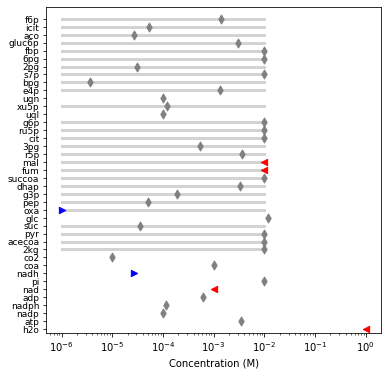

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
mdf_sol.plot_concentrations(ax=ax)

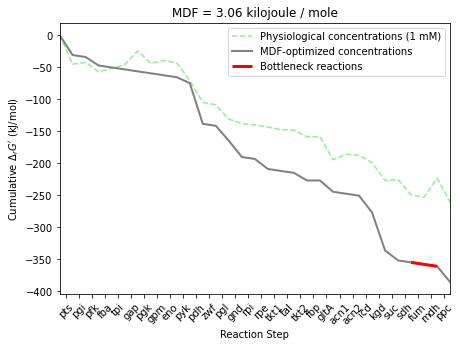

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
mdf_sol.plot_driving_forces(ax=ax)

# solving MDMC using OSQP

In [9]:
mdmc_sol = pp._make_pathway_thermo_model(optlang.osqp_interface).find_mdmc(min_lb=0, max_lb=10)

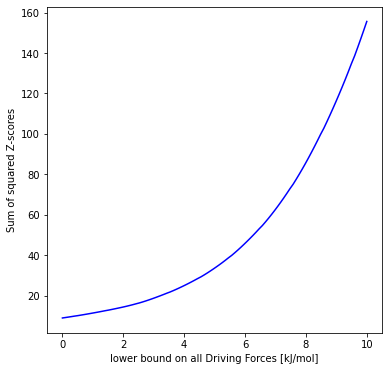

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
mdmc_sol.plot_objectives(ax=ax)

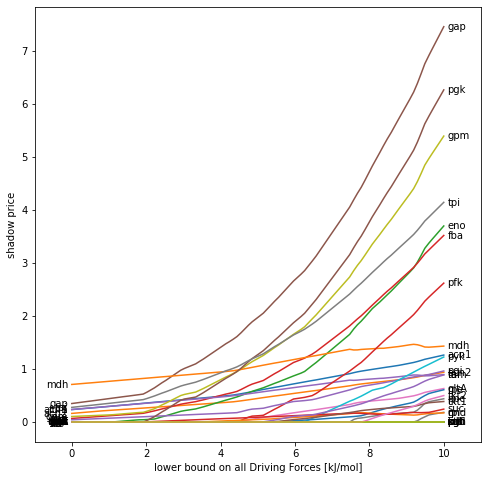

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
mdmc_sol.plot_reaction_prices(ax=ax, normalized=False)

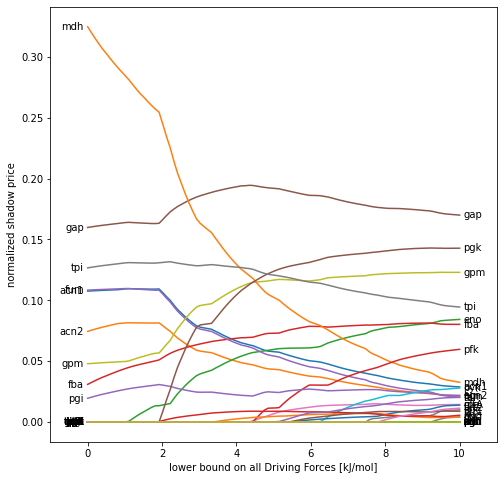

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
mdmc_sol.plot_reaction_prices(ax=ax, normalized=True)

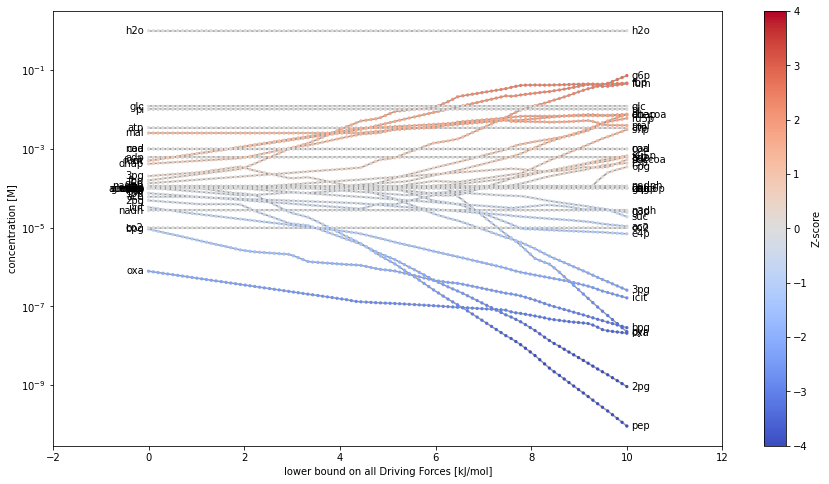

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
mdmc_sol.plot_concentrations(ax=ax)